In [470]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pylab
from pylab import legend
from pylab import plot, show, title, xlabel, ylabel
import statsmodels.api as sm
from statsmodels.stats import proportion
from scipy.stats import norm,t
from statsmodels.stats.proportion import proportions_ztest

In [234]:
df=pd.read_csv('credit_risk_applicants.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
df.shape

(307511, 122)

In [236]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [238]:
df_crapp.isna().sum().sum()

np.int64(9152465)

In [239]:
df_cca_info = pd.DataFrame({
    "dtype": df.dtypes,
    "null_count": df.isnull().sum(),
})
df_cca_info["null_percent"] = ((df_cca_info["null_count"] / len(df)) * 100).round(2)

print(df_cca_info)

                              dtype  null_count  null_percent
SK_ID_CURR                    int64           0           0.0
TARGET                        int64           0           0.0
NAME_CONTRACT_TYPE           object           0           0.0
CODE_GENDER                  object           0           0.0
FLAG_OWN_CAR                 object           0           0.0
...                             ...         ...           ...
AMT_REQ_CREDIT_BUREAU_DAY   float64       41519          13.5
AMT_REQ_CREDIT_BUREAU_WEEK  float64       41519          13.5
AMT_REQ_CREDIT_BUREAU_MON   float64       41519          13.5
AMT_REQ_CREDIT_BUREAU_QRT   float64       41519          13.5
AMT_REQ_CREDIT_BUREAU_YEAR  float64       41519          13.5

[122 rows x 3 columns]


-----------------------

# Cleaning 

In [240]:
df_clean = df.copy()

In [241]:
threshold_percentage = 50
limit = len(df_clean) * (threshold_percentage / 100)

cols_to_drop = []
for col in df_clean.columns:
    missing_percentage = (df_clean[col].isna().sum() / len(df_clean)) * 100
    if missing_percentage > threshold_percentage:
        cols_to_drop.append(col)

# Drop all at once (more efficient)
df_clean = df_clean.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns with >{threshold_percentage}% missing values")
print(f"Dropped Columns: \n {cols_to_drop}")

Dropped 41 columns with >50% missing values
Dropped Columns: 
 ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [242]:
df_clean.shape

(307511, 81)

In [243]:
df_cca_info = pd.DataFrame({
    "dtype": df_clean.dtypes,
    "null_count": df_clean.isnull().sum(),
})
df_cca_info["null_percent"] = ((df_cca_info["null_count"] / len(df_clean)) * 100).round(2)

print(df_cca_info)

                              dtype  null_count  null_percent
SK_ID_CURR                    int64           0           0.0
TARGET                        int64           0           0.0
NAME_CONTRACT_TYPE           object           0           0.0
CODE_GENDER                  object           0           0.0
FLAG_OWN_CAR                 object           0           0.0
...                             ...         ...           ...
AMT_REQ_CREDIT_BUREAU_DAY   float64       41519          13.5
AMT_REQ_CREDIT_BUREAU_WEEK  float64       41519          13.5
AMT_REQ_CREDIT_BUREAU_MON   float64       41519          13.5
AMT_REQ_CREDIT_BUREAU_QRT   float64       41519          13.5
AMT_REQ_CREDIT_BUREAU_YEAR  float64       41519          13.5

[81 rows x 3 columns]


In [244]:
df_clean.isna().sum().sum()

np.int64(1616066)

#### Drop document flags & weak flags
- These flag columns record minor yes/no details with almost no variation and very weak relevance to loan default, so removing them reduces noise without losing meaningful information.

In [245]:
flag_doc_cols = [c for c in df_clean.columns if "FLAG_DOCUMENT" in c]

weak_flag_cols = [
    "FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE",
    "FLAG_EMAIL","FLAG_CONT_MOBILE"
]

df_clean.drop(columns=flag_doc_cols + weak_flag_cols, inplace=True)

#### Filling Null Values of Important columns
##### Simple numeric missing values 
- Very few missing → median imputation is safe:
    - AMT_ANNUITY – 12 NaN
    - CNT_FAM_MEMBERS – 2 NaN
    - DAYS_LAST_PHONE_CHANGE – 1 NaN

In [251]:
cols = ['AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']
for col in cols:
    df_clean[col]= df_clean[col].fillna(df_clean[col].median())

##### Categorical columns with many NaNs → "Unknown"
- NAME_TYPE_SUITE
- OCCUPATION_TYPE

In [252]:
col_na = ["NAME_TYPE_SUITE", "OCCUPATION_TYPE"]

for col in col_na:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna("Unknown")

In [253]:
df_clean.shape

(307511, 56)

##### Filling EXT_SOURCE_1 / 2 / 3 → median
- EXT_SOURCE variables are among the most important predictors of default, so instead of removing those customers we fill missing values with the median to retain data while keeping the values realistic and consistent.

In [254]:
for col in ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

##### AMT_GOODS_PRICE value filling
- AMT_GOODS_PRICE ≈ value of product purchased
- AMT_CREDIT ≈ loan amount approved
- Since AMT_GOODS_PRICE is strongly linked to AMT_CREDIT, estimating missing values using their typical ratio preserves the real business relationship between loan amount and purchase price instead of assigning an arbitrary value.

In [255]:
ratio = (df_clean.loc[df_clean['AMT_GOODS_PRICE'].notnull(), 'AMT_GOODS_PRICE'] / 
         df_clean.loc[df_clean['AMT_GOODS_PRICE'].notnull(), 'AMT_CREDIT']).median()

In [256]:
df_clean.loc[df_clean['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = \
df_clean.loc[df_clean['AMT_GOODS_PRICE'].isnull(), 'AMT_CREDIT'] * ratio

##### Columns BUREAU and SOCIAL_CIRCLE:
- How many times the lender checked your credit in last hour / day / week / etc.
- System didn’t record any inquiry → meaning ZERO inquiries.

In [259]:
bureau_cols = [
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

for col in bureau_cols:
    df_clean[col]= df_clean[col].fillna(0)

social_cols = [
    "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"
]
for col in social_cols:
    df_clean[col] = df_clean[col].fillna(0)

In [376]:
#DAYS_EMPLOYED placeholder value → replace 365243 with NaN.
df_clean['DAYS_EMPLOYED'] = df_clean['DAYS_EMPLOYED'].replace(365243, np.nan)

In [377]:
#	Convert that into employment years.
df_clean['YEARS_EMPLOYED'] = -df_clean['DAYS_EMPLOYED'] / 365.25

In [378]:
#DAYS_BIRTH CONVERTING TO AGE YEARS
df_clean['Age_years']=-df_clean['DAYS_BIRTH']/365.25

In [379]:
#NEW COLUM MAKE AGE YEARS WHERE THE VALUE THINK SO CORRECT
df_clean.Age_years.head()

0    25.902806
1    45.900068
2    52.145106
3    52.032854
4    54.570842
Name: Age_years, dtype: float64

##### Drop very weak, high-null housing-type columns

In [261]:
# Remove columns with >40% nulls (adjust threshold as needed)
high_null_cols = [
    "FLOORSMAX_MEDI", "FLOORSMAX_AVG", "FLOORSMAX_MODE",
    "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BEGINEXPLUATATION_MODE",
    "TOTALAREA_MODE", "EMERGENCYSTATE_MODE"
]

# Check which actually exist in your DataFrame
cols_to_drop = [col for col in high_null_cols if col in df_clean.columns]
df_clean.drop(columns=cols_to_drop, inplace=True)

In [262]:
df_clean.isnull().sum().sort_values(ascending=False).head(20)

SK_ID_CURR                     0
TARGET                         0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
dtype: int64

-----------------------

In [263]:
df_clean.shape

(307511, 48)

In [264]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

----------------------

In [267]:
from scipy import stats

### Identify Key Numerical Columns for Outlier Analysis

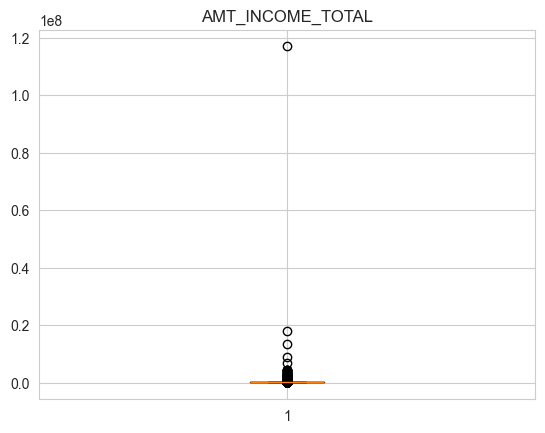

In [313]:
#CHECKING FOR INCOME COLUMN 

plt.boxplot(df_clean.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL')
plt.show()

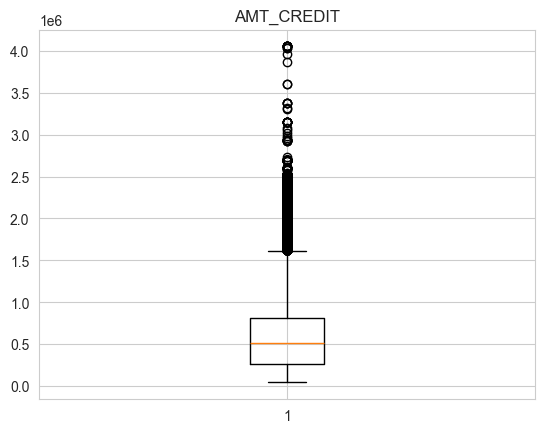

In [314]:
plt.boxplot(df_clean.AMT_CREDIT)
plt.title('AMT_CREDIT')
plt.show()

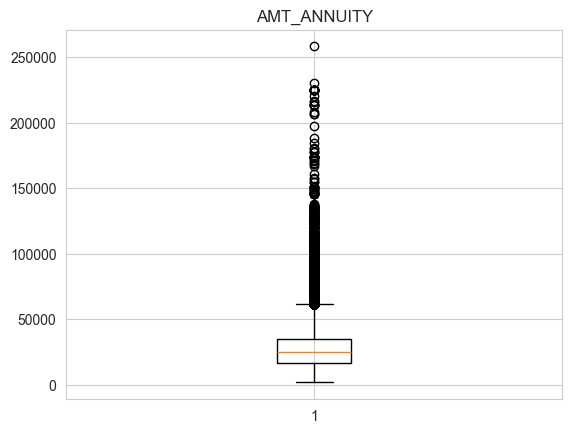

In [315]:
plt.boxplot(df_clean.AMT_ANNUITY)
plt.title('AMT_ANNUITY')
plt.show()

In [316]:
#SAVING IN ONE COLUM FOR DELETING THE OUTLIERS
cols_outliers=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']

# USES FOR LOOP FOR DELTING OUTLIERS 
for col in cols_outliers:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df[col] >= lower) & (df_clean[col] <= upper)]

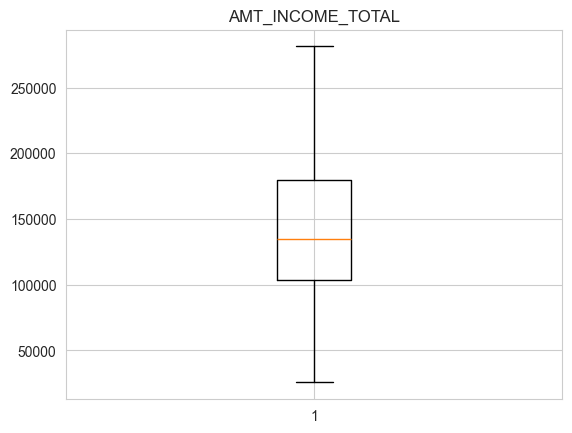

In [317]:
plt.boxplot(df_clean.AMT_INCOME_TOTAL)
plt.title('AMT_INCOME_TOTAL')
plt.show()

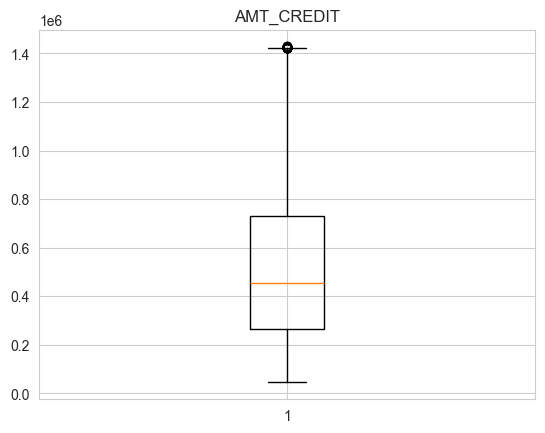

In [318]:
plt.boxplot(df_clean.AMT_CREDIT)
plt.title('AMT_CREDIT')
plt.show()

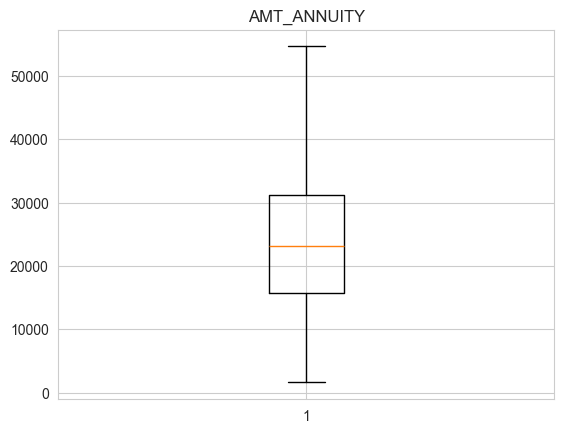

In [319]:
plt.boxplot(df_clean.AMT_ANNUITY)
plt.title('AMT_ANNUITY')
plt.show()

-----------------------------

### Feature Engineering

In [320]:
# 1. AGE_YEARS
df_clean['AGE_YEARS'] = -(df_clean['DAYS_BIRTH'] // 365)

In [321]:
# 2. YEARS_EMPLOYED
df_clean['YEARS_EMPLOYED'] = -(df_clean['DAYS_EMPLOYED'] // 365)

In [326]:
# 3. Flag Variables
#has_prev_refusal
#has_prev_approval
df_clean['has_prev_refusal'] = (df_clean['NAME_CONTRACT_TYPE'] == 'Refused').astype(int)
df_clean['has_prev_approval'] = (df_clean['NAME_CONTRACT_TYPE'] == 'Approved').astype(int)

#has_prev_refusal = 1 if ANY previous rejection
#has_prev_approval = 1 if ANY previous approval
#Missing customers get 0

In [325]:
# 4. Ratio Feature
df_clean['CREDIT_TO_INCOME_RATIO'] = df_clean['AMT_CREDIT'] / df_clean['AMT_INCOME_TOTAL']

In [327]:
df_clean.shape

(267245, 53)

-------------------------------

### Exploratory Data Analysis (EDA)

#### Numerical variables

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

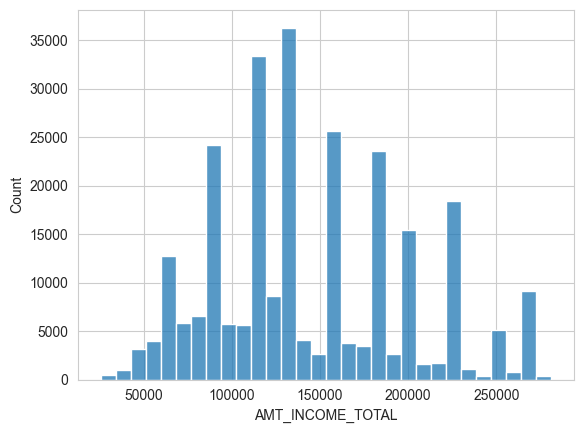

In [333]:
sns.histplot(df_clean['AMT_INCOME_TOTAL'], bins=30)

<Axes: xlabel='AMT_CREDIT', ylabel='Count'>

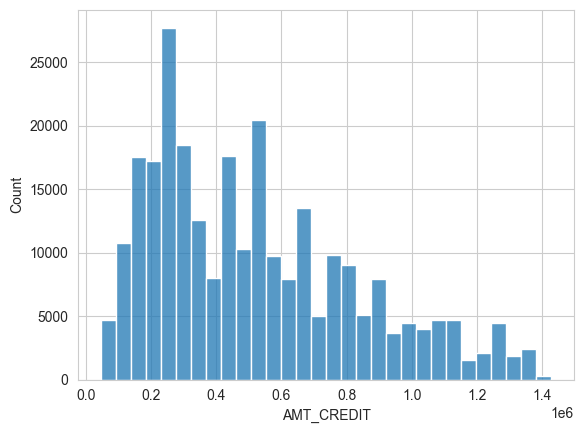

In [334]:
sns.histplot(df_clean['AMT_CREDIT'], bins=30)

<Axes: xlabel='AMT_ANNUITY', ylabel='Count'>

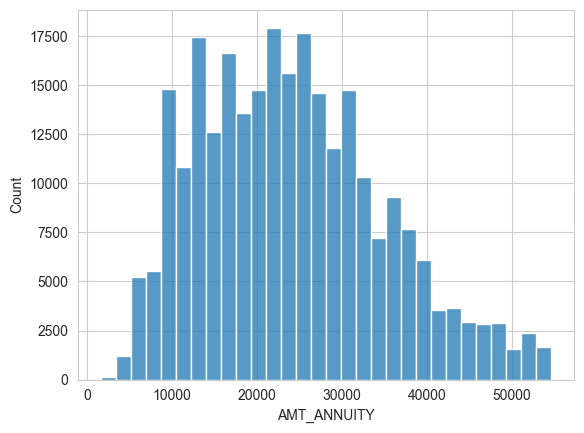

In [335]:
sns.histplot(df_clean['AMT_ANNUITY'], bins=30)

### Categorical variables

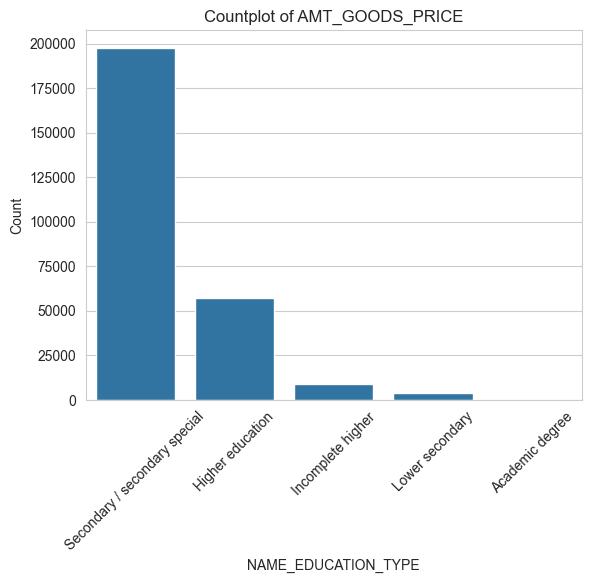

In [339]:
sns.countplot(x="NAME_EDUCATION_TYPE", data=df_clean)

plt.xlabel("NAME_EDUCATION_TYPE")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Countplot of AMT_GOODS_PRICE")
plt.show()

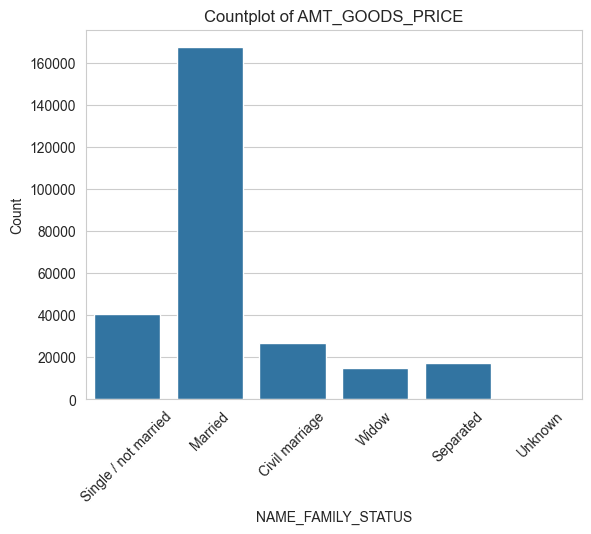

In [340]:
# Family status
sns.countplot(x="NAME_FAMILY_STATUS", data=df_clean)

plt.xlabel("NAME_FAMILY_STATUS")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Countplot of AMT_GOODS_PRICE")
plt.show()

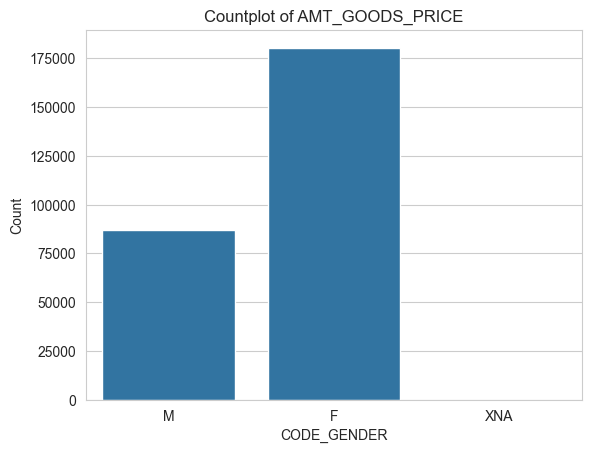

In [342]:
# Gender
sns.countplot(x="CODE_GENDER", data=df_clean)

plt.xlabel("CODE_GENDER")
plt.ylabel("Count")
plt.title("Countplot of AMT_GOODS_PRICE")
plt.show()

### Bivariate Analysis (TARGET vs features)

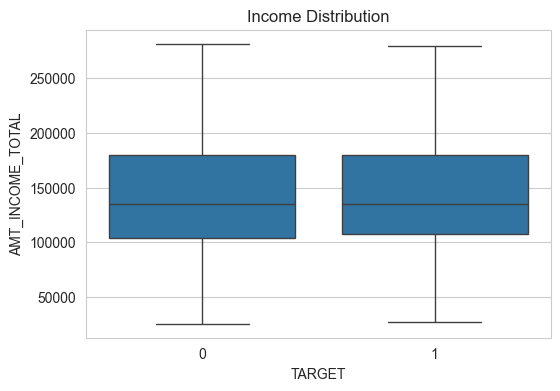

In [350]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['TARGET'], y=df_clean['AMT_INCOME_TOTAL'])
plt.xticks([0,1])
plt.title("Income Distribution")
plt.show()

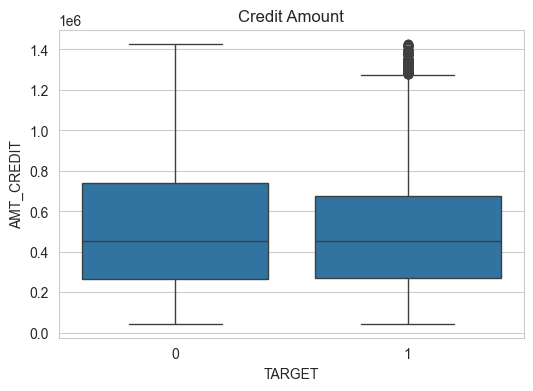

In [351]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['TARGET'], y=df_clean['AMT_CREDIT'])
plt.xticks([0,1])
plt.title("Credit Amount")
plt.show()


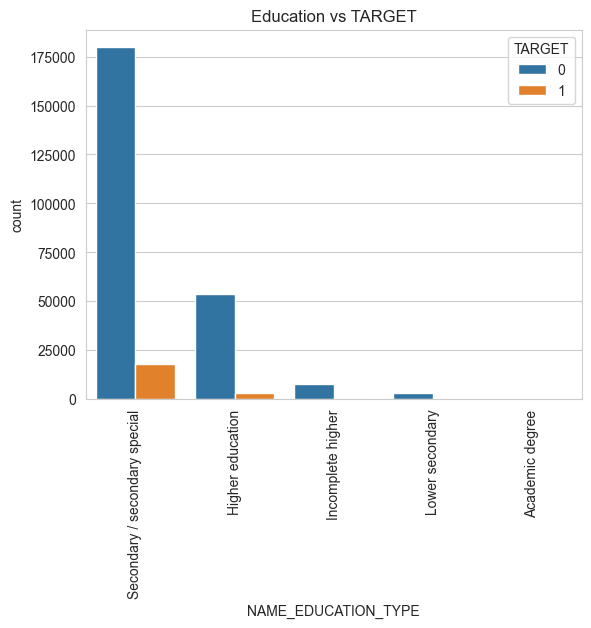

In [362]:
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=df_clean)
plt.xticks(rotation=90)
plt.title("Education vs TARGET")
plt.show()

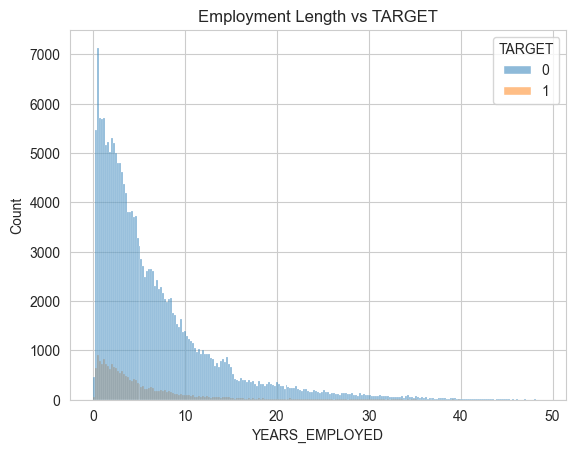

In [368]:
sns.histplot(data=df, x='YEARS_EMPLOYED', hue='TARGET')
plt.title("Employment Length vs TARGET")
plt.show()

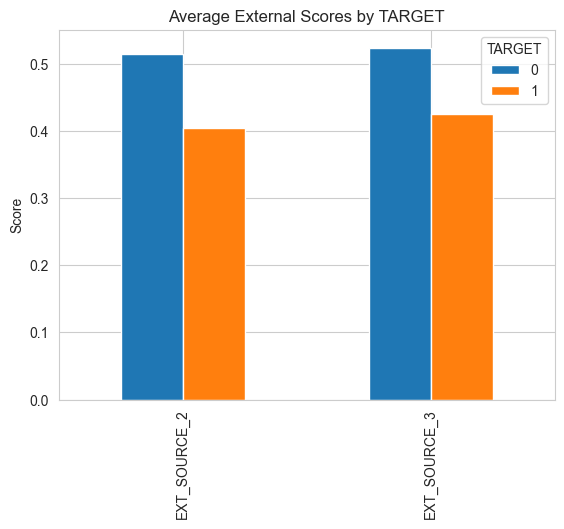

In [369]:
ext_cols = ['EXT_SOURCE_2', 'EXT_SOURCE_3']
df_clean.groupby('TARGET')[ext_cols].mean().T.plot(kind='bar')
plt.title("Average External Scores by TARGET")
plt.ylabel("Score")
plt.show()

### Multivariate Analysis

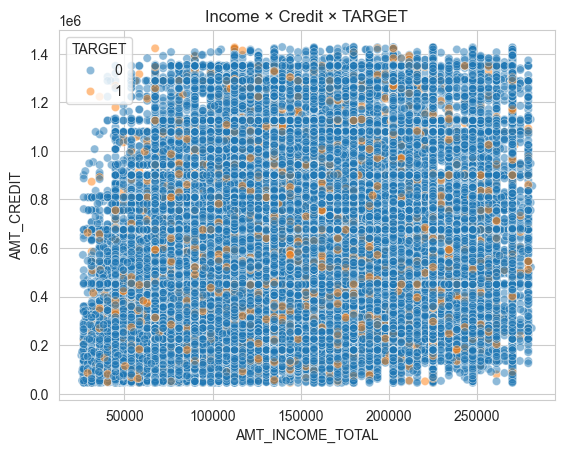

In [370]:
sns.scatterplot(
    data=df_clean,
    x='AMT_INCOME_TOTAL',
    y='AMT_CREDIT',
    hue='TARGET',
    alpha=0.5
)
plt.title("Income × Credit × TARGET")
plt.show()


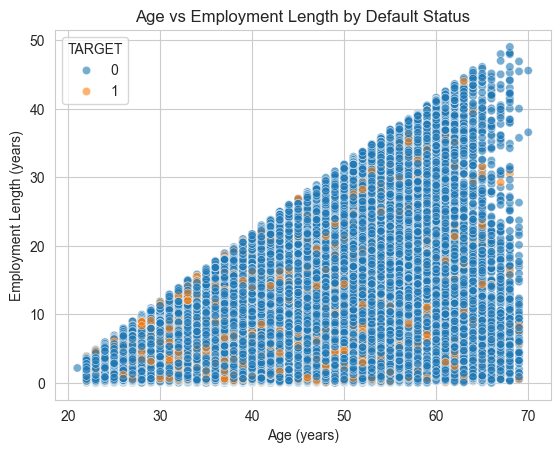

In [380]:
sns.scatterplot(
    data=df_clean,
    x='AGE_YEARS',
    y='YEARS_EMPLOYED',
    hue='TARGET',
    alpha=0.6
)
plt.title("Age vs Employment Length by Default Status")
plt.xlabel("Age (years)")
plt.ylabel("Employment Length (years)")
plt.show()


### Correlation Analysis

In [404]:
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_df.corr()
# corr_matrix

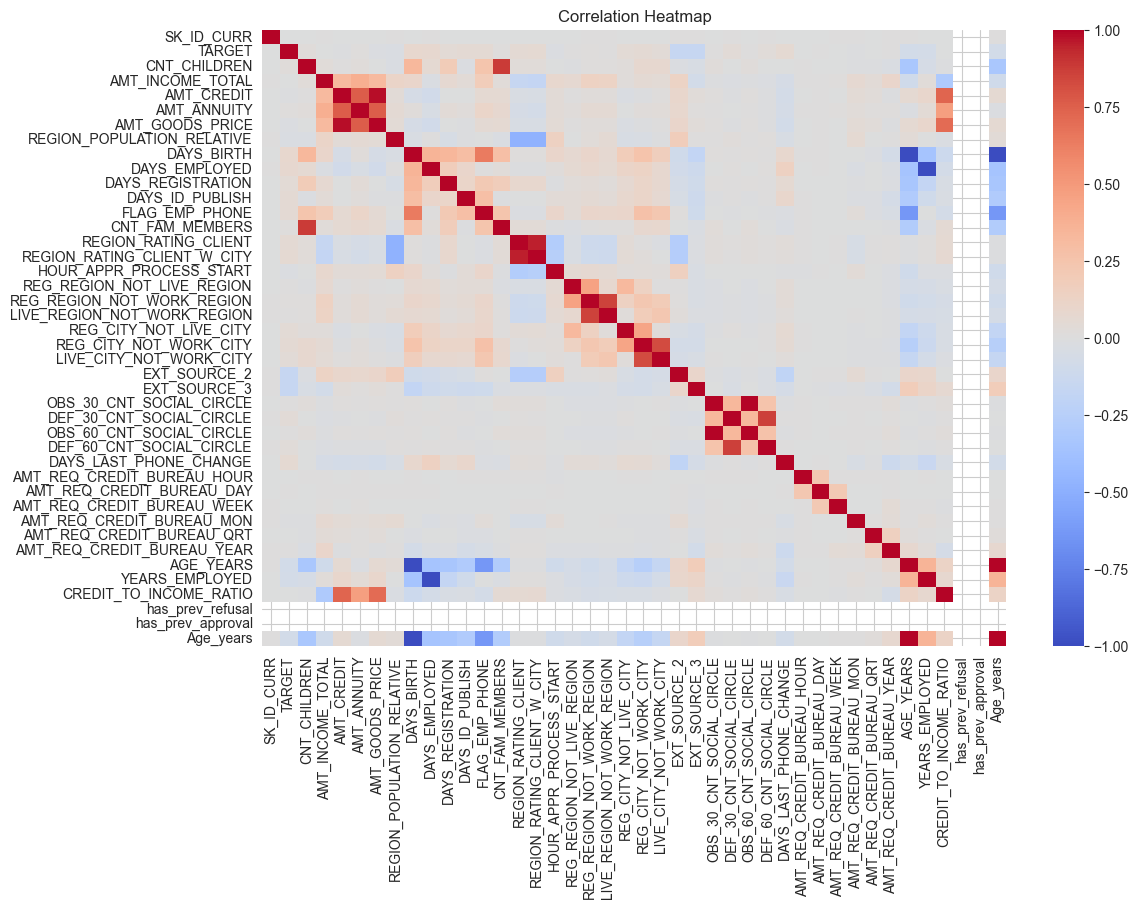

In [435]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [436]:
# B. Find Top Predictors of TARGET
#We sort correlations with TARGET in descending order.
target_corr = corr_matrix['TARGET'].sort_values(ascending=False)
target_corr


TARGET                         1.000000
DAYS_BIRTH                     0.081972
DAYS_EMPLOYED                  0.074039
DAYS_LAST_PHONE_CHANGE         0.057553
REGION_RATING_CLIENT_W_CITY    0.056419
REGION_RATING_CLIENT           0.054370
DAYS_ID_PUBLISH                0.053736
REG_CITY_NOT_WORK_CITY         0.053329
FLAG_EMP_PHONE                 0.051015
REG_CITY_NOT_LIVE_CITY         0.046101
DAYS_REGISTRATION              0.045149
LIVE_CITY_NOT_WORK_CITY        0.034177
DEF_30_CNT_SOCIAL_CIRCLE       0.032163
DEF_60_CNT_SOCIAL_CIRCLE       0.030838
CNT_CHILDREN                   0.020844
AMT_ANNUITY                    0.014208
CNT_FAM_MEMBERS                0.011819
REG_REGION_NOT_WORK_REGION     0.011059
OBS_30_CNT_SOCIAL_CIRCLE       0.007257
REG_REGION_NOT_LIVE_REGION     0.007250
OBS_60_CNT_SOCIAL_CIRCLE       0.007112
LIVE_REGION_NOT_WORK_REGION    0.006917
AMT_REQ_CREDIT_BUREAU_YEAR     0.004926
AMT_REQ_CREDIT_BUREAU_DAY      0.001624
AMT_REQ_CREDIT_BUREAU_HOUR    -0.000944


In [384]:
# C. Plot Top 10 Predictors of TARGET
#Interpretation Rules:

#Negative correlation with TARGET
#lower value = safer customer
#typical example: EXT_SOURCE_2, EXT_SOURCE_3

#Positive correlation
# higher value increases default risk

#Absolute value matters
# |corr| > 0.1 = meaningful
# |corr| > 0.20 = strong

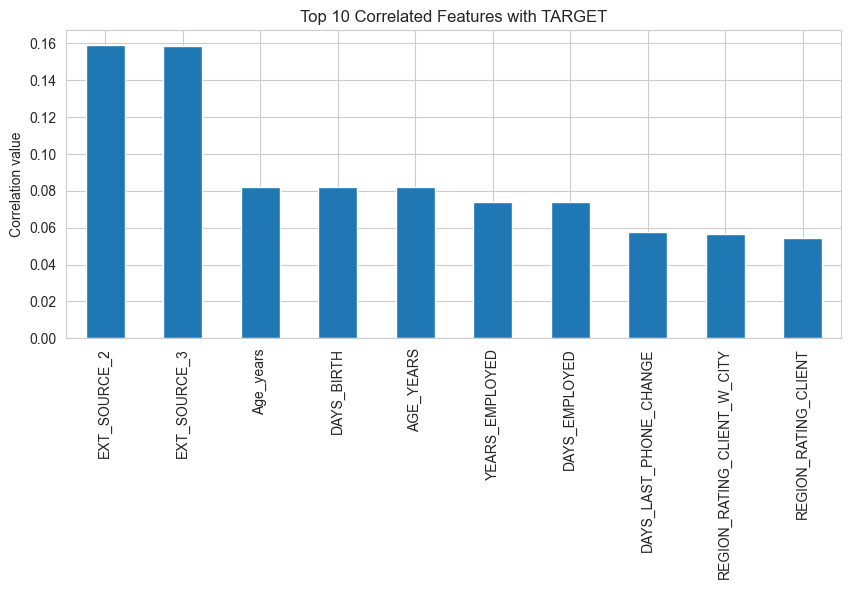

In [385]:
top_10 = target_corr.abs().sort_values(ascending=False)[1:11]   # skip TARGET itself

top_10.plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Correlated Features with TARGET")
plt.ylabel("Correlation value")
plt.show()


----------------

## Load Data credit_risk_previous_loans

In [405]:
df_loans=pd.read_csv('credit_risk_previous_loans.csv')
df_loans.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
df_loans.shape

(1670214, 37)

In [407]:
print(df_loans.dtypes.value_counts())

object     16
float64    15
int64       6
Name: count, dtype: int64


In [408]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [479]:
df_loans.isna().sum().sum()

np.int64(11109336)

In [412]:
df_loans.columns.tolist()

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

--------------------------

### Data Cleaning for credit_risk_previous_loans

In [413]:
# Calculate % of missing values

missing_percent = df_loans.isnull().mean() * 100
print("\nMissing value percentage per column:")
print(missing_percent.sort_values(ascending=False))


Missing value percentage per column:
RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY

In [414]:
# Drop columns with >40% missing values

threshold = 40
cols_to_drop = missing_percent[missing_percent > threshold].index
df_clean_loan = df_loans.drop(columns=cols_to_drop)

print("\nDropped columns:")
print(cols_to_drop)


Dropped columns:
Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


### Fill missing values

In [416]:
df_clean_loan.shape

(1670214, 26)

In [417]:
df_clean_loan.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [418]:
# Numeric ---> Fill with median

numeric_cols = df_clean_loan.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    df_clean_loan[col] = df_clean_loan[col].fillna(df_clean_loan[col].median())

In [419]:
# Categorical ---> Fill with mode

categorical_cols = df_clean_loan.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_clean_loan[col] = df_clean_loan[col].fillna(df_clean_loan[col].mode()[0])

In [420]:
missing_percent = df_clean_loan.isnull().mean() * 100
print("\nMissing value percentage per column:")
print(missing_percent.sort_values(ascending=False))


Missing value percentage per column:
SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_YIELD_GROUP               0.0
CNT_PAYMENT                    0.0
NAME_SELLER_INDUSTRY           0.0
SELLERPLACE_AREA               0.0
CHANNEL_TYPE                   0.0
NAME_PRODUCT_TYPE              0.0
NAME_PORTFOLIO                 0.0
NAME_GOODS_CATEGORY            0.0
NAME_CLIENT_TYPE               0.0
CODE_REJECT_REASON             0.0
NAME_PAYMENT_TYPE              0.0
DAYS_DECISION                  0.0
NAME_CONTRACT_STATUS           0.0
NAME_CASH_LOAN_PURPOSE         0.0
NFLAG_LAST_APPL_IN_DAY         0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
HOUR_APPR_PROCESS_START        0.0
WEEKDAY_APPR_PROCESS_START     0.0
AMT_GOODS_PRICE                0.0
AMT_CREDIT                     0.0
AMT_APPLICATION                0.0
AMT_ANNUITY                    0.0
NAME_CONTRACT_TYPE             0.0
PRODUCT_COMBINATION            0.0
dtype: float64


In [421]:
df_clean_loan.select_dtypes(include=['int64','float64']).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [423]:
df_clean_loan.DAYS_DECISION

0           -73
1          -164
2          -301
3          -512
4          -781
           ... 
1670209    -544
1670210   -1694
1670211   -1488
1670212   -1185
1670213   -1193
Name: DAYS_DECISION, Length: 1670214, dtype: int64

In [424]:
# Convert to absolute value (positive number of days)
df_clean_loan['DAYS_DECISION_ABS'] = df_clean_loan['DAYS_DECISION'].abs()

In [425]:
# Convert DAYS_DECISION into Years
df_clean_loan['DECISION_YEARS'] = -(df_clean_loan['DAYS_DECISION'] / 365)

In [426]:
df_clean_loan.DECISION_YEARS

0          0.200000
1          0.449315
2          0.824658
3          1.402740
4          2.139726
             ...   
1670209    1.490411
1670210    4.641096
1670211    4.076712
1670212    3.246575
1670213    3.268493
Name: DECISION_YEARS, Length: 1670214, dtype: float64

In [427]:
df_clean_loan.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_DECISION_ABS', 'DECISION_YEARS'],
      dtype='object')

-----------------------------------

### Outliers

<Axes: xlabel='AMT_CREDIT'>

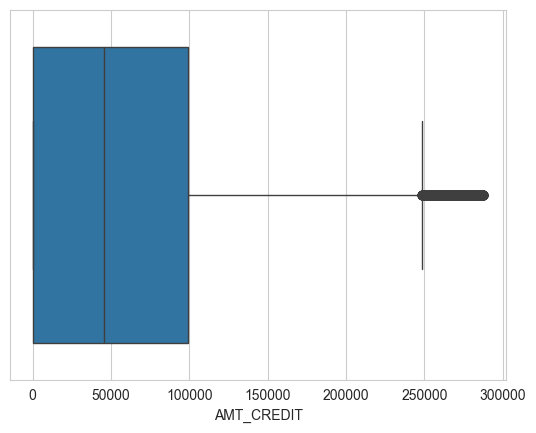

In [437]:
sns.boxplot(x=df_clean_loan['AMT_CREDIT'])

<Axes: xlabel='AMT_ANNUITY'>

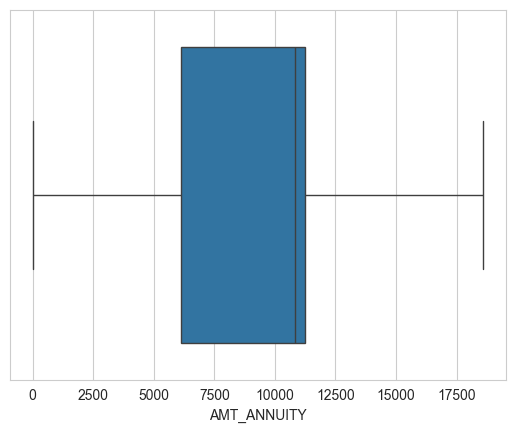

In [438]:
sns.boxplot(x=df_clean_loan['AMT_ANNUITY'])

<Axes: xlabel='AMT_APPLICATION'>

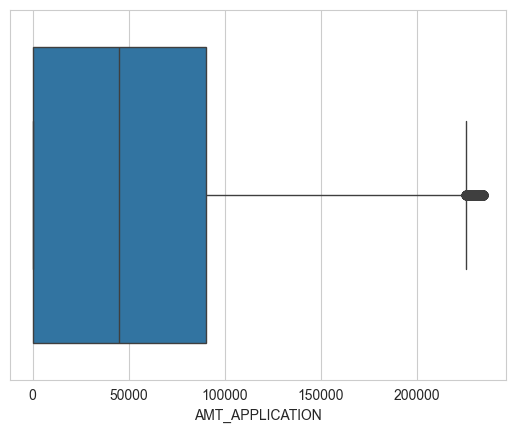

In [439]:
sns.boxplot(x=df_clean_loan['AMT_APPLICATION'])

In [440]:
# IQR Outlier Removal
num_cols = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_APPLICATION']
for col in num_cols:
    if col in df_clean_loan.columns:
        Q1 = df_clean_loan[col].quantile(0.25)
        Q3 = df_clean_loan[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Removing outliers
        df_clean_loan = df_clean_loan[(df_clean_loan[col] >= lower) & (df_clean_loan[col] <= upper)]


<Axes: xlabel='AMT_CREDIT'>

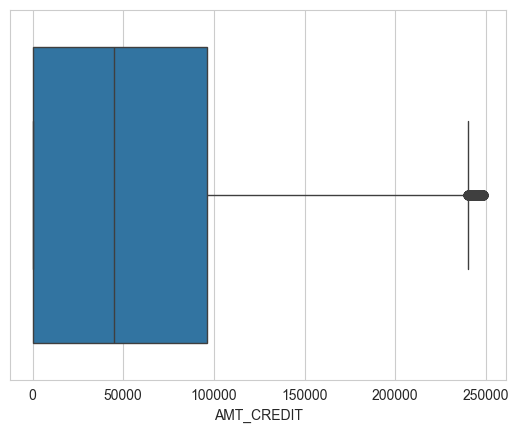

In [441]:
sns.boxplot(x=df_clean_loan['AMT_CREDIT'])

<Axes: xlabel='AMT_ANNUITY'>

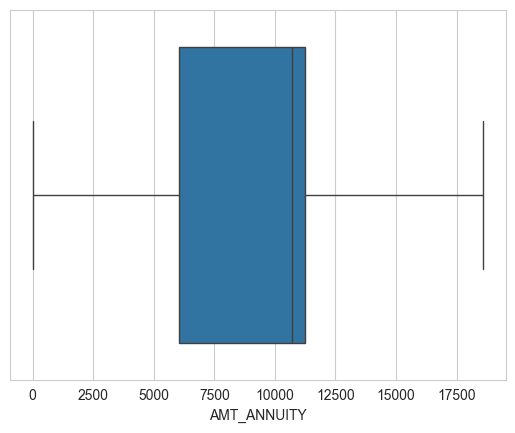

In [442]:
sns.boxplot(x=df_clean_loan['AMT_ANNUITY'])

<Axes: xlabel='AMT_APPLICATION'>

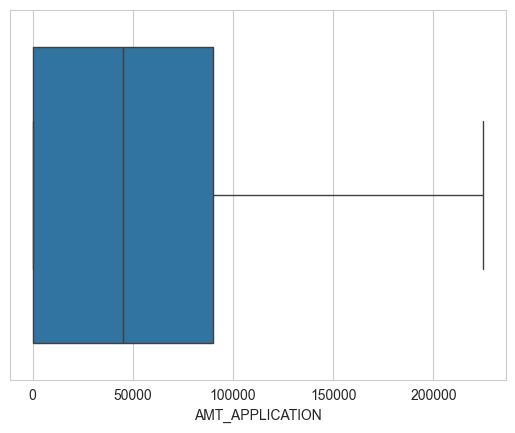

In [443]:
sns.boxplot(x=df_clean_loan['AMT_APPLICATION'])

-----------------------

### Feature Engineering

In [444]:
# Create Ratio Features

# Credit / Annuity ratio
df_clean_loan['CREDIT_ANNUITY_RATIO'] = df_clean_loan['AMT_CREDIT'] / df_clean_loan['AMT_ANNUITY']

# Application / Credit ratio
df_clean_loan['APPLICATION_CREDIT_RATIO'] = df_clean_loan['AMT_APPLICATION'] / df_clean_loan['AMT_CREDIT']

In [445]:
# Create Flag Columns (Refused / Approved)

# Flags based on contract status
df_clean_loan['IS_REFUSED'] = (df_clean_loan['NAME_CONTRACT_STATUS'] == 'Refused').astype(int)
df_clean_loan['IS_APPROVED'] = (df_clean_loan['NAME_CONTRACT_STATUS'] == 'Approved').astype(int)

In [480]:
df_clean_loan.shape

(1221698, 32)

In [481]:
print(df_clean_loan.dtypes.value_counts())

object     15
int64       9
float64     8
Name: count, dtype: int64


---------------------

### Exploratory Data Analysis (EDA)

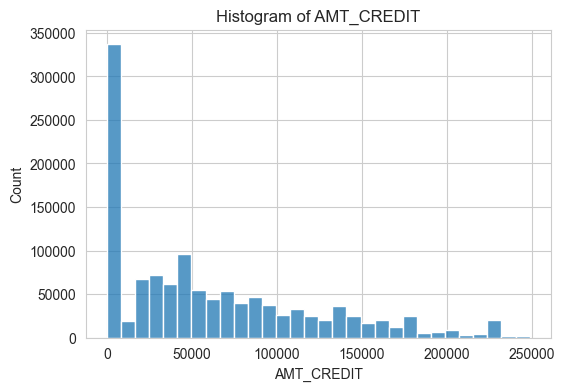

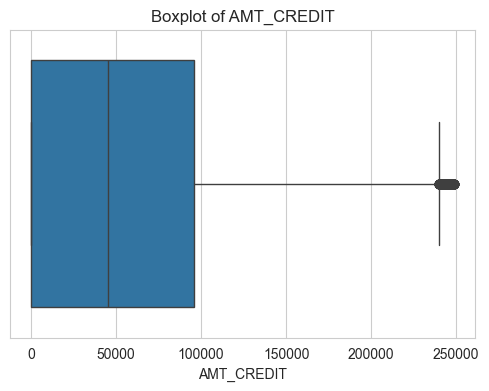

In [446]:
# Univariate Analysis
# Numerical

plt.figure(figsize=(6,4))
sns.histplot(df_clean_loan['AMT_CREDIT'], bins=30)
plt.title('Histogram of AMT_CREDIT')
plt.show()

# -------------------------------------------

plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean_loan['AMT_CREDIT'])
plt.title('Boxplot of AMT_CREDIT')
plt.show()

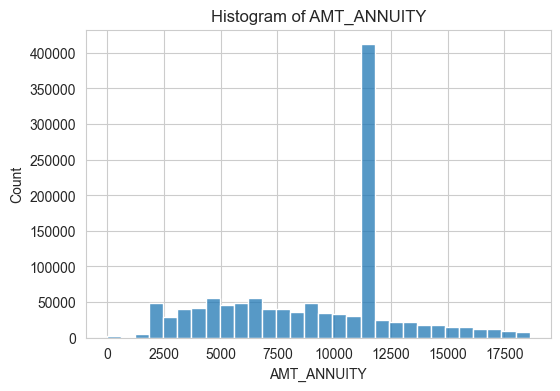

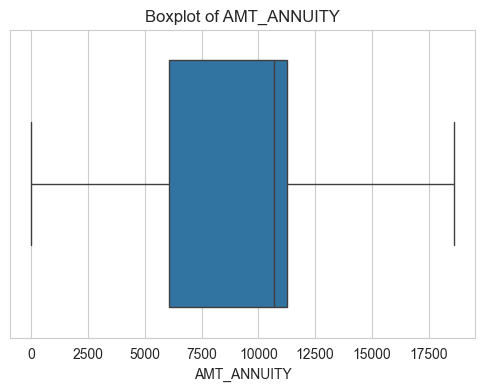

In [447]:
plt.figure(figsize=(6,4))
sns.histplot(df_clean_loan['AMT_ANNUITY'], bins=30)
plt.title('Histogram of AMT_ANNUITY')
plt.show()

# -----------------------------------------

plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean_loan['AMT_ANNUITY'])
plt.title('Boxplot of AMT_ANNUITY')
plt.show()

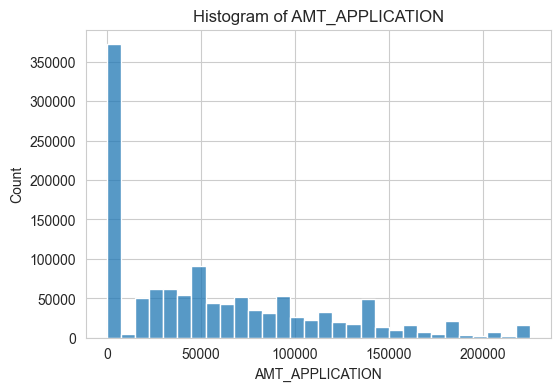

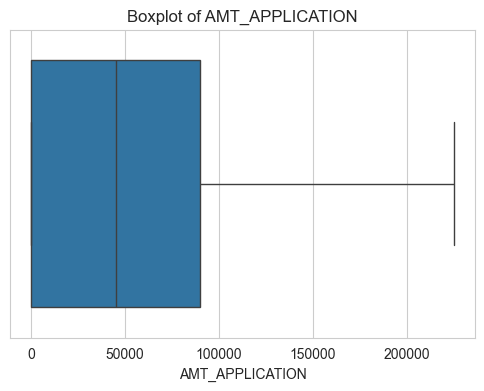

In [448]:
plt.figure(figsize=(6,4))
sns.histplot(df_clean_loan['AMT_APPLICATION'], bins=30)
plt.title('Histogram of AMT_APPLICATION')
plt.show()

# ---------------------------------------------------

plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean_loan['AMT_APPLICATION'])
plt.title('Boxplot of AMT_APPLICATION')
plt.show()

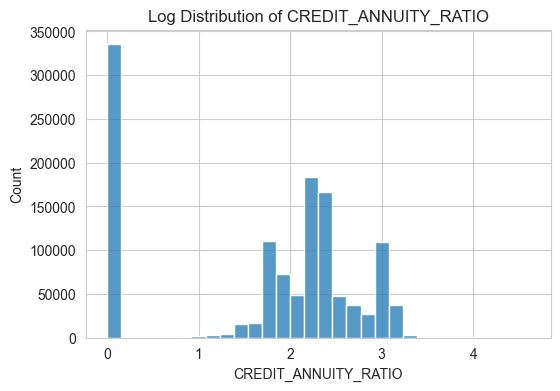

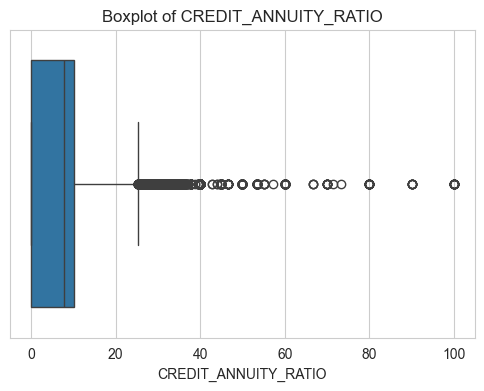

In [449]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df_clean_loan['CREDIT_ANNUITY_RATIO']), bins=30)
plt.title('Log Distribution of CREDIT_ANNUITY_RATIO')
plt.show()

# -------------------------------------------------

plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean_loan['CREDIT_ANNUITY_RATIO'])
plt.title('Boxplot of CREDIT_ANNUITY_RATIO')
plt.show()

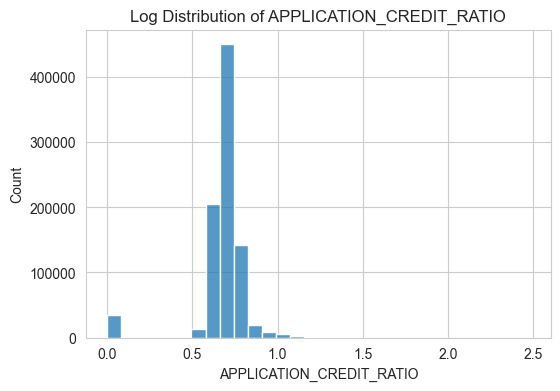

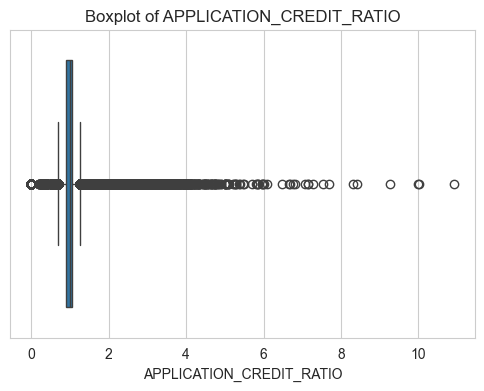

In [450]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df_clean_loan['APPLICATION_CREDIT_RATIO']), bins=30)
plt.title('Log Distribution of APPLICATION_CREDIT_RATIO')
plt.show()

# ----------------------------------------------

plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean_loan['APPLICATION_CREDIT_RATIO'])
plt.title('Boxplot of APPLICATION_CREDIT_RATIO')
plt.show()

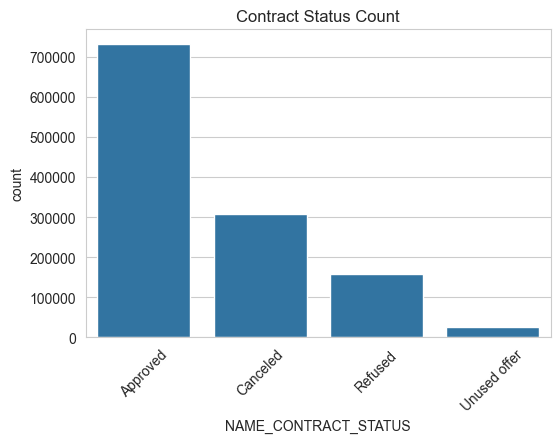

In [452]:
# Categorical Variables

plt.figure(figsize=(6,4))
sns.countplot(x='NAME_CONTRACT_STATUS', data=df_clean_loan)
plt.title('Contract Status Count')
plt.xticks(rotation=45)
plt.show()

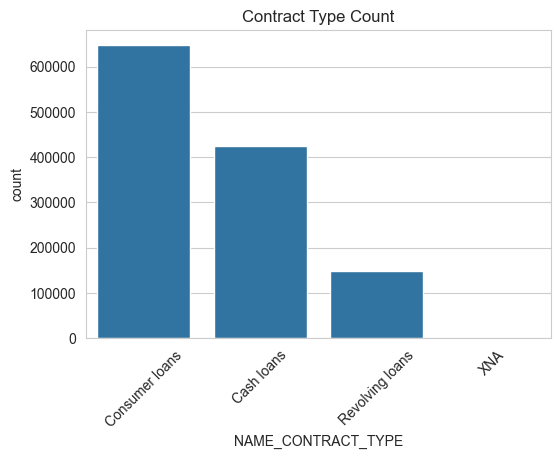

In [453]:
plt.figure(figsize=(6,4))
sns.countplot(x='NAME_CONTRACT_TYPE', data=df_clean_loan)
plt.title('Contract Type Count')
plt.xticks(rotation=45)
plt.show()

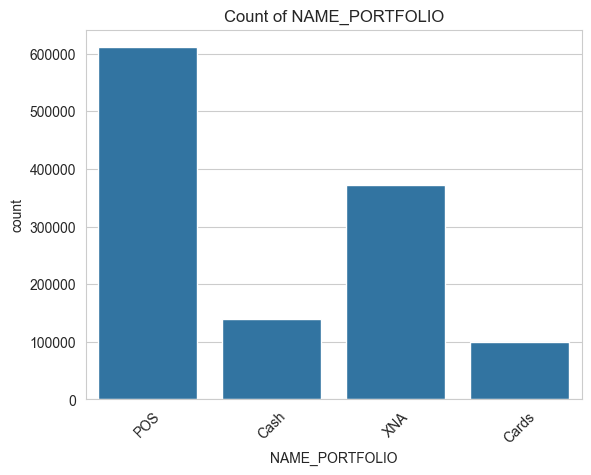

In [454]:
for cat in ['NAME_PORTFOLIO']:
    if cat in df_clean_loan.columns:
        plt.figure()
        sns.countplot(x=cat, data=df_clean_loan)
        plt.title(f"Count of {cat}")
        plt.xticks(rotation=45)
        plt.show()

### BIVARIATE ANALYSIS (Status vs Features)

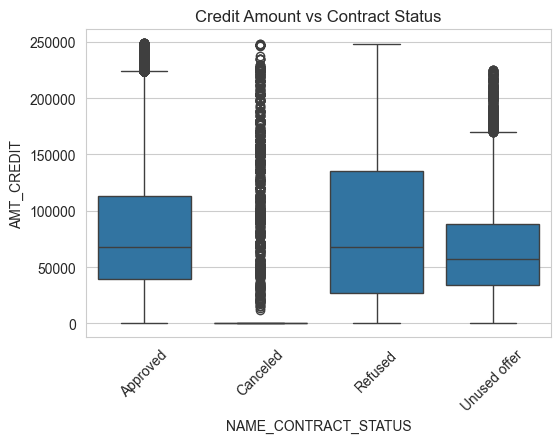

In [455]:
# Credit Amount vs Status – Boxplot
#boxplot (shows how credit differs for approved vs refused)
plt.figure(figsize=(6,4))
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', data=df_clean_loan)
plt.title('Credit Amount vs Contract Status')
plt.xticks(rotation=45)
plt.show()

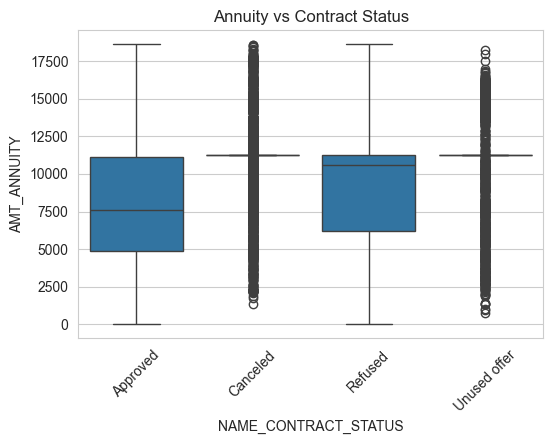

In [456]:
# Annuity vs Status – Boxplot
# shows repayment burden differences
plt.figure(figsize=(6,4))
sns.boxplot(x='NAME_CONTRACT_STATUS', y='AMT_ANNUITY', data=df_clean_loan)
plt.title('Annuity vs Contract Status')
plt.xticks(rotation=45)
plt.show()


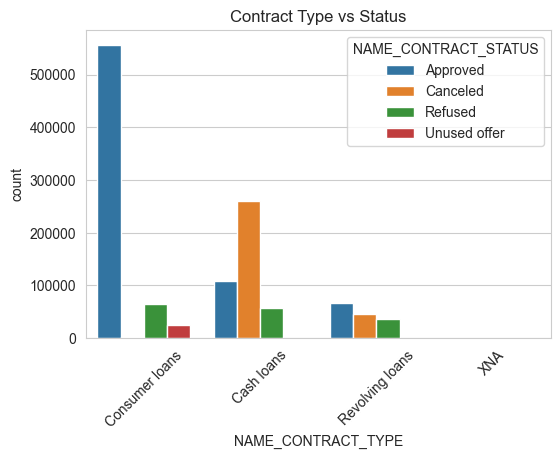

In [457]:
# Contract Type vs Status – Bar Chart

plt.figure(figsize=(6,4))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='NAME_CONTRACT_STATUS', data=df_clean_loan)
plt.title('Contract Type vs Status')
plt.xticks(rotation=45)
plt.show()

In [458]:
df_clean_loan["NAME_CONTRACT_STATUS"]

0          Approved
2          Approved
6          Canceled
7          Canceled
8          Canceled
             ...   
1670203     Refused
1670205     Refused
1670207     Refused
1670210    Approved
1670211    Approved
Name: NAME_CONTRACT_STATUS, Length: 1221698, dtype: object

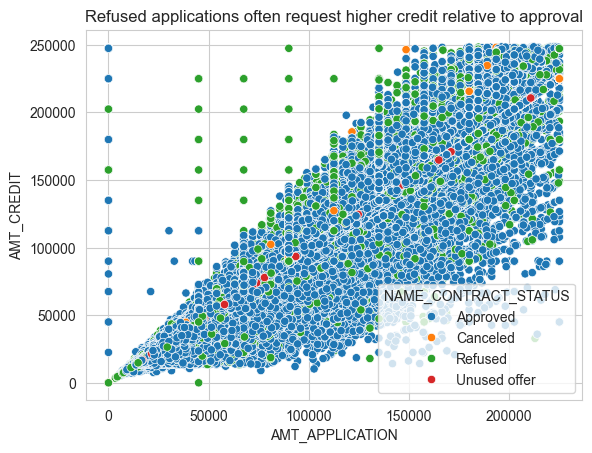

In [459]:
# Application vs Credit – Refused vs Approved

#Application Amount vs Credit Amount —
#approved vs refused comparison
#(shows if refused apps request higher amounts)
sns.scatterplot(x=df_clean_loan["AMT_APPLICATION"], y=df_clean_loan["AMT_CREDIT"], hue=df_clean_loan["NAME_CONTRACT_STATUS"])
plt.title("Refused applications often request higher credit relative to approval")
plt.show()


### MULTIVARIATE ANALYSIS

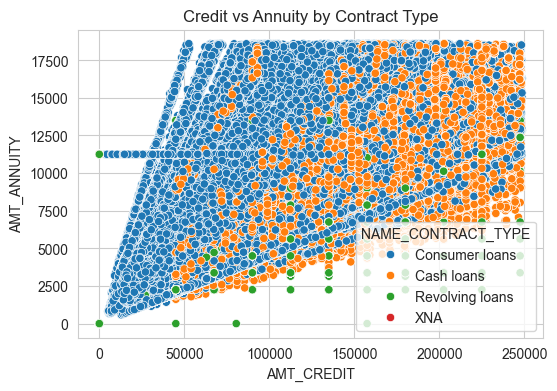

In [460]:
# AMT_CREDIT × AMT_ANNUITY × CONTRACT TYPE – Scatterplot

plt.figure(figsize=(6,4))
sns.scatterplot(
    x='AMT_CREDIT',
    y='AMT_ANNUITY',
    hue='NAME_CONTRACT_TYPE',
    data=df_clean_loan
)
plt.title('Credit vs Annuity by Contract Type')
plt.show()


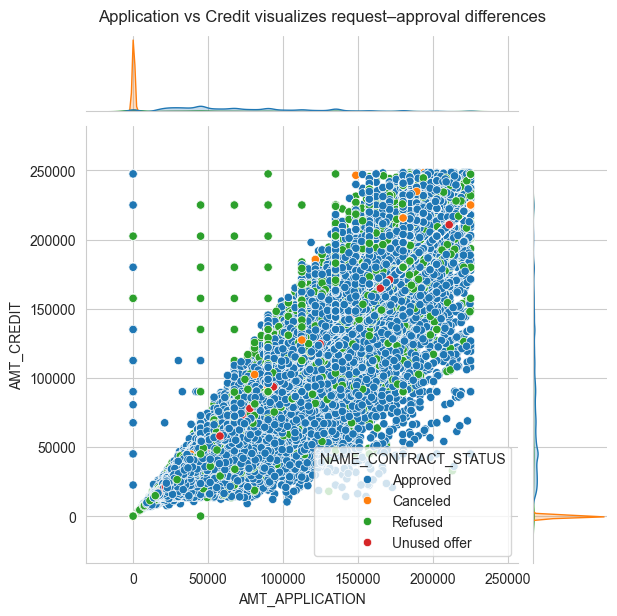

In [461]:
sns.jointplot(x="AMT_APPLICATION", y="AMT_CREDIT", data=df_clean_loan, kind="scatter", hue="NAME_CONTRACT_STATUS")
plt.suptitle("Application vs Credit visualizes request–approval differences", y=1.02)
plt.show()

### Correlation Analysis

In [462]:
# Correlation Matrix (Numeric Columns)

# Select only numeric columns
num_df = df_clean_loan.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = num_df.corr()

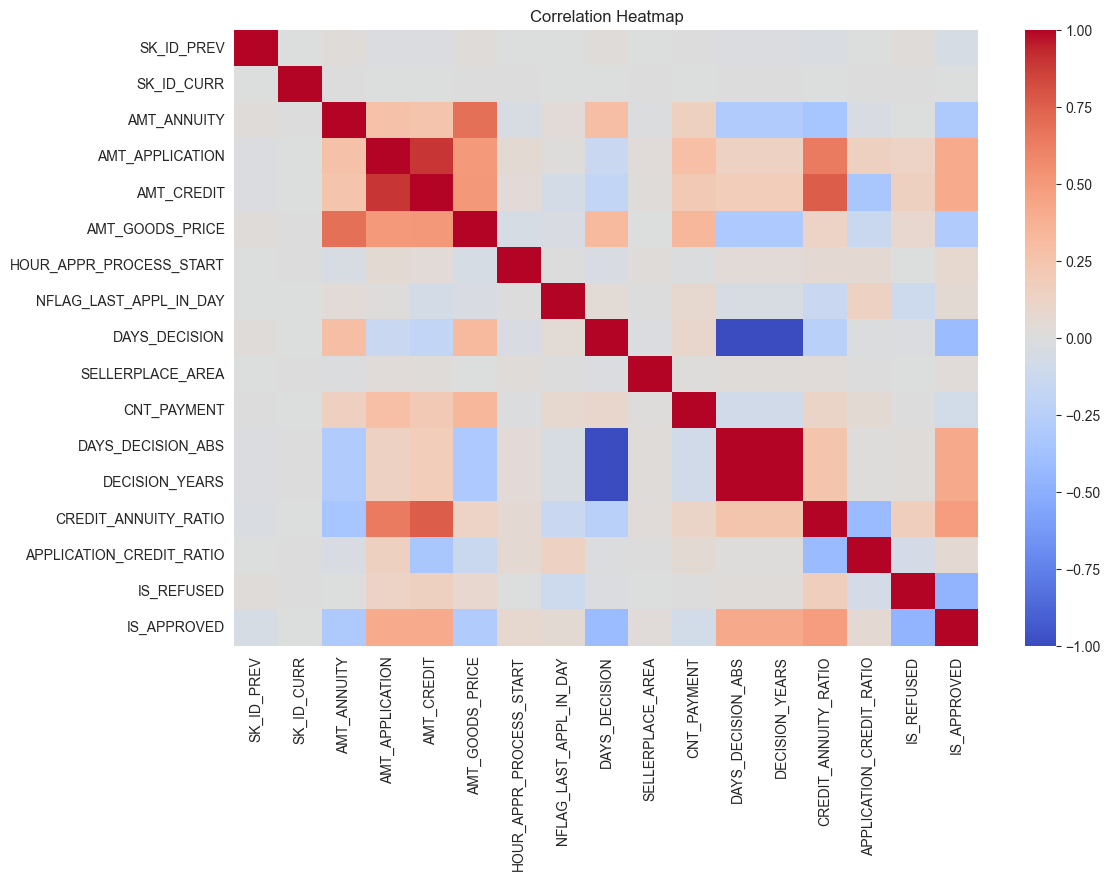

In [463]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [464]:
# Top Features Correlated with Key Columns
#Identifies features most linked to refusals.
corr_matrix['IS_REFUSED'].sort_values(ascending=False)

IS_REFUSED                  1.000000
CREDIT_ANNUITY_RATIO        0.167681
AMT_CREDIT                  0.151429
AMT_APPLICATION             0.129648
AMT_GOODS_PRICE             0.080778
DECISION_YEARS              0.022153
DAYS_DECISION_ABS           0.022153
SK_ID_PREV                  0.021362
CNT_PAYMENT                 0.001399
SK_ID_CURR                  0.000774
AMT_ANNUITY                -0.001915
SELLERPLACE_AREA           -0.002446
HOUR_APPR_PROCESS_START    -0.002681
DAYS_DECISION              -0.022153
APPLICATION_CREDIT_RATIO   -0.065940
NFLAG_LAST_APPL_IN_DAY     -0.109862
IS_APPROVED                -0.468831
Name: IS_REFUSED, dtype: float64

--------------------------

### Aggregation of Previous Loans (df_clean_loan)

In [465]:
# Count total previous applications and rejections
prev_agg = df_clean_loan.groupby('SK_ID_CURR').agg(
    PREV_LOAN_COUNT=('SK_ID_PREV', 'count'),
    PREV_REJECTION_COUNT=('NAME_CONTRACT_STATUS', lambda x: (x == 'Refused').sum()),
    AVG_PREV_CREDIT=('AMT_CREDIT', 'mean'),
    DAYS_LAST_DECISION=('DAYS_DECISION', 'min') # Min days means the decision made closest to the current application (least negative)
).reset_index()

# Calculate rejection rate
prev_agg['PREV_REJECTION_RATE'] = prev_agg['PREV_REJECTION_COUNT'] / prev_agg['PREV_LOAN_COUNT']
print("Previous loan data aggregated.")

# Merge aggregated data back to the main applicants table
df_app = pd.merge(df_clean, prev_agg, on='SK_ID_CURR', how='left')

# Fill NaN created by the merge (clients with no previous history)
df_app['PREV_REJECTION_COUNT'].fillna(0, inplace=True)
df_app['PREV_LOAN_COUNT'].fillna(0, inplace=True)
df_app['PREV_REJECTION_RATE'].fillna(0, inplace=True)
print("Aggregated previous loan data merged.")

Previous loan data aggregated.
Aggregated previous loan data merged.


In [466]:
df_app.shape

(267245, 59)

------------------------

### Hypothesis Testing

### Test-1 : Do defaulters have significantly lower income than non-defaulters?

- **Null Hypothesis (H0):** Mean income of defaulters = mean income of non-defaulters  
- **Alternative (H1):** Mean income of defaulters ≠ mean income of non-defaulters 

In [472]:
income_defaulters = df_app[df_app["TARGET"] == 1]["AMT_INCOME_TOTAL"].dropna()
income_non_defaulters = df_app[df_app["TARGET"] == 0]["AMT_INCOME_TOTAL"].dropna()

t_stat, p_val = stats.ttest_ind(income_defaulters, income_non_defaulters, equal_var=False)

print("T-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 – Income levels are significantly different between defaulters and non-defaulters.")
else:
    print("Conclusion: Fail to reject H0 – No significant difference in income.")

T-statistic: -2.6709895493048266
p-value: 0.007567334294319654
Conclusion: Reject H0 – Income levels are significantly different between defaulters and non-defaulters.


### Test-2: Is the default rate different across genders?

- **H0:** Gender and default are independent  
- **H1:** Gender and default are associated 

In [473]:
gender_default_table = pd.crosstab(df_app["CODE_GENDER"], df_app["TARGET"])
chi2, p_val, dof, expected = stats.chi2_contingency(gender_default_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_val)
print("Degrees of freedom:", dof)

if p_val < 0.05:
    print("Conclusion: Reject H0 – Gender is significantly associated with default.")
else:
    print("Conclusion: Fail to reject H0 – No significant relationship between gender and default.")

Chi-square statistic: 978.4494511121437
p-value: 3.407228661599478e-213
Degrees of freedom: 2
Conclusion: Reject H0 – Gender is significantly associated with default.



### Test-3: Is Education Level Associated with Default? (Chi-Square Test)

- **H0:** Education level and default are independent  
- **H1:** Education level and default are associated  


In [475]:
edu_default_table = pd.crosstab(df_app["NAME_EDUCATION_TYPE"], df_app["TARGET"])

chi2, p_val, dof, expected = stats.chi2_contingency(edu_default_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_val)

if p_val < 0.05:
    print("Conclusion: Reject H0 – Education level is significantly associated with default.")
else:
    print("Conclusion: Fail to reject H0 – No significant relationship between education and default.")

Chi-square statistic: 707.9060455799992
p-value: 6.765910183887087e-152
Conclusion: Reject H0 – Education level is significantly associated with default.
